# 1.Load the data file using pandas. 

In [535]:
import pandas as pd

In [536]:
import numpy as np

In [538]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [539]:
googleplay_df = pd.read_csv("C:/Users/44758/Downloads/1569582940_googleplaystore/googleplaystore.csv")

In [540]:
googleplay_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 2.Check for null values in the data. Get the number of null values for each column.

In [541]:
googleplay_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 3.Drop records with nulls in any of the columns. 

In [542]:
googleplay_df.dropna(axis = 1)

,App,Category,Reviews,Size,Installs,Price,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",0,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",0,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",0,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",0,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",0,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",0,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,0,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",0,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",0,Books & Reference,"January 19, 2015"


# 4.1.1. Variables seem to have incorrect type and inconsistent formatting. You need to fix them: Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric. 

In [543]:
googleplay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [544]:
print(googleplay_df.Size.value_counts())

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64


# 4.1.1/4.1.2. Extract the numeric value from the column. Multiply the value by 1,000, if size is mentioned in Mb

In [545]:
def change(Size):
    if 'M'in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x

    elif 'k'in Size:
        x=Size[:-1]
        x=float(x)
        return x
    
    else: return None

In [546]:
googleplay_df.Size = googleplay_df.Size.map(change);
googleplay_df.Size.value_counts()

11000.0    198
12000.0    196
14000.0    194
13000.0    191
15000.0    184
          ... 
430.0        1
429.0        1
200.0        1
460.0        1
619.0        1
Name: Size, Length: 459, dtype: int64

In [361]:
googleplay_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 4.2. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [547]:
googleplay_df.drop([10472], inplace = True)

In [548]:
googleplay_df.Reviews.value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
4272        1
5517        1
4057        1
459797      1
398307      1
Name: Reviews, Length: 6001, dtype: int64

In [549]:
googleplay_df['Reviews']= googleplay_df['Reviews'].astype('int32')

In [550]:
googleplay_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


# 4.3.1/ 4.3.2. Installs field is currently stored as string and has values like 1,000,000+. Treat 1,000,000+ as 1,000,000. remove ‘+’, ‘,’ from the field, convert it to integer

In [551]:
googleplay_df['Installs'] = googleplay_df['Installs'].str.replace('+','')

In [552]:
googleplay_df['Installs'] = googleplay_df['Installs'].str.replace(',', '')

In [553]:
googleplay_df['Installs'] = googleplay_df['Installs'].astype(int)

In [439]:
googleplay_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 4.4. Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [554]:
googleplay_df['Price'] = googleplay_df['Price'].str.replace('$', '')

In [555]:
print(googleplay_df.loc[[10798]]) # dollar sign removed

                        App Category  Rating  Reviews    Size  Installs  Type  \
10798  Word Search Tab 1 FR   FAMILY     NaN        0  1020.0        50  Paid   

      Price Content Rating  Genres      Last Updated Current Ver Android Ver  
10798  1.04       Everyone  Puzzle  February 6, 2012         1.1  3.0 and up  


In [556]:
googleplay_df['Price'] = googleplay_df['Price'].astype(float)

# 4.5.1 Sanity checks: Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [557]:
googleplay_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.3+ MB


In [558]:
googleplay_df.loc[googleplay_df.Rating < 1] & googleplay_df.loc[googleplay_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [559]:
pd.unique(googleplay_df[['Rating']].values.ravel())

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

# 4.5.2. Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [560]:
googleplay_df.loc[googleplay_df['Reviews'] > googleplay_df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,NaN,4,64000.0,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,NaN,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5812,AX Watch for WatchMaker,PERSONALIZATION,NaN,2,238.0,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6508,Sam.BN Pro,TOOLS,NaN,11,2000.0,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
9096,DZ Puzzle,FAMILY,NaN,14,47000.0,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


In [561]:
googleplay_df.drop(googleplay_df[googleplay_df['Reviews']>googleplay_df['Installs']].index,inplace=True)

In [562]:
googleplay_df.loc[googleplay_df['Reviews'] > googleplay_df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 4.5.3. For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [563]:
googleplay_df.shape

(10829, 13)

In [564]:
print(len(googleplay_df[(googleplay_df.Type == 'free')&(googleplay_df.Price>0)]))

0


# 5. Performing univariate analysis: Boxplot for Price. Are there any outliers? Think about the price of usual apps on Play Store.

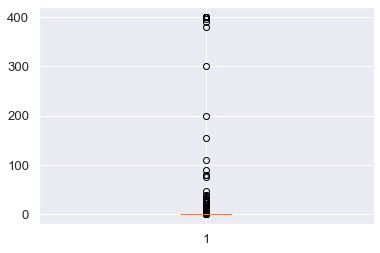

In [566]:
plt.boxplot(googleplay_df['Price'])
plt.show()

# Boxplot for Reviews. Are there any apps with very high number of reviews? Do the values seem right?

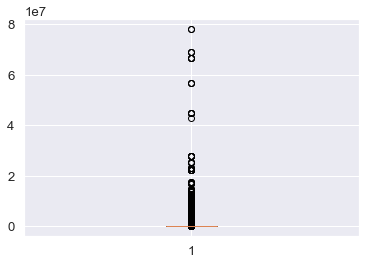

In [567]:
plt.boxplot(googleplay_df['Reviews'])
plt.show()

# Histogram for Rating : How are the ratings distributed? Is it more toward higher ratings?

[[<AxesSubplot:title={'center':'Rating'}>]]


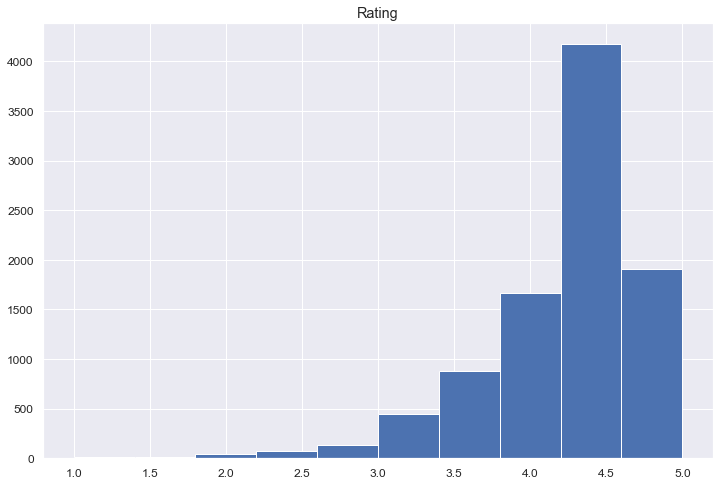

In [568]:
print(googleplay_df.hist(['Rating'],figsize=(12,8),xlabelsize=12,ylabelsize=12))

<AxesSubplot:>

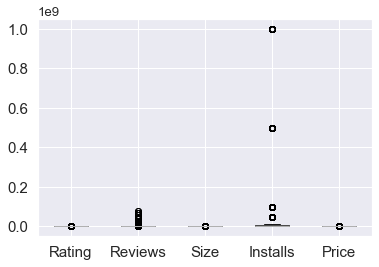

In [569]:
googleplay_df.boxplot(fontsize=15)

# Histogram for Size : Note down your observations for the plots made above. Which of these seem to have outliers?

[[<AxesSubplot:title={'center':'Size'}>]]


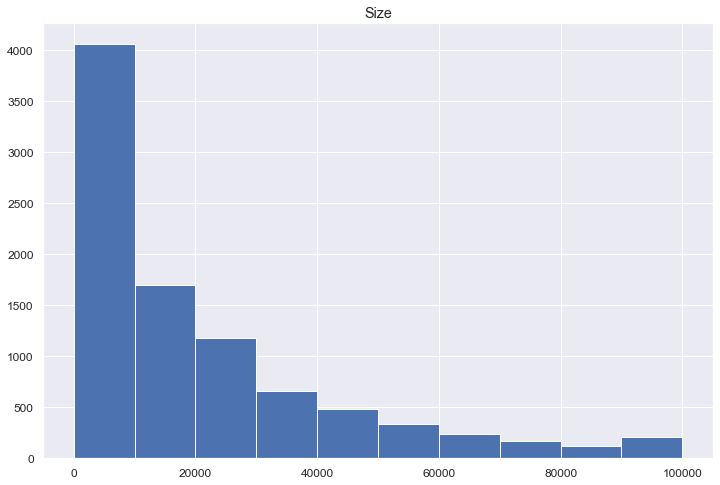

In [570]:
print(googleplay_df.hist(['Size'],figsize=(12,8),xlabelsize=12,ylabelsize=12))

array([[<AxesSubplot:title={'center':'Reviews'}>,
        <AxesSubplot:title={'center':'Installs'}>]], dtype=object)

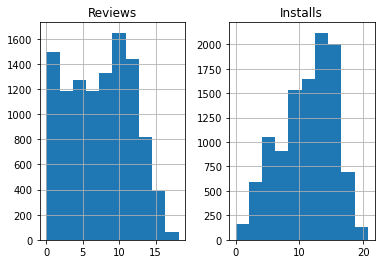

In [392]:
googleplay_df.Reviews=googleplay_df.Reviews.apply(func=np.log1p)
googleplay_df.Installs=googleplay_df.Installs.apply(func=np.log1p)

googleplay_df.hist(column=['Reviews','Installs'])

[[<AxesSubplot:title={'center':'Rating'}>
  <AxesSubplot:title={'center':'Reviews'}>]
 [<AxesSubplot:title={'center':'Size'}>
  <AxesSubplot:title={'center':'Installs'}>]
 [<AxesSubplot:title={'center':'Price'}> <AxesSubplot:>]]


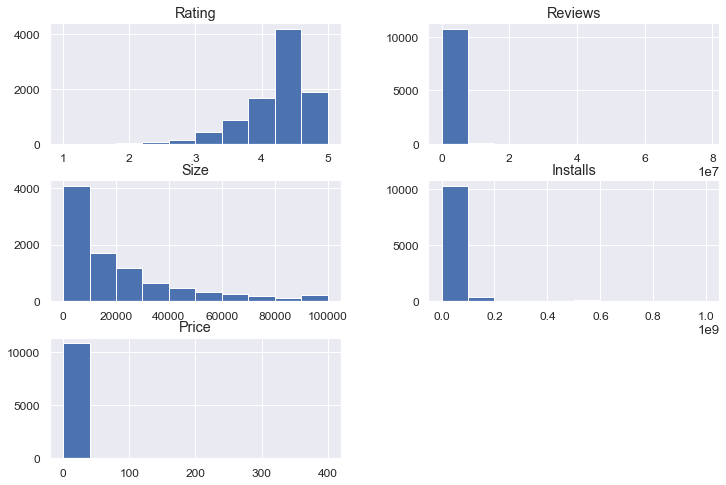

In [571]:
print(googleplay_df.hist(['Rating','Reviews','Size','Installs','Price'],figsize=(12,8),xlabelsize=12,ylabelsize=12))

In [586]:
avg_app_rating = googleplay_df['Rating'].mean()
print('Average app rating = ', avg_app_rating)

Average app rating =  4.173931423203388


# 6.1.1 Outlier treatment: Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious! Check out the records with very high price/ 6.1.1.1. Is 200 indeed a high price?

In [587]:
print('Yes we can expect apps on the play store to cost $200')
googleplay_df.loc[googleplay_df['Price'] > 200]

Yes we can expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [588]:
pd.plotting.register_matplotlib_converters()
from sklearn import metrics
from sklearn import preprocessing

In [589]:
rows = googleplay_df[googleplay_df["Price"]>200].index

# 6.1.2. Drop these as most seem to be junk apps

In [590]:
googleplay_df.drop(rows,inplace=True)

# 6.2. Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [591]:
googleplay_df.Reviews.value_counts()

0         594
1         272
2         211
3         175
4         135
         ... 
24281       1
52028       1
18039       1
22748       1
398307      1
Name: Reviews, Length: 5247, dtype: int64

In [592]:
googleplay_df[googleplay_df.Reviews >= 20000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [593]:
rows = googleplay_df[googleplay_df["Reviews"]>20000000].index

In [594]:
googleplay_df.drop(rows,inplace=True)

# 6.3.1. Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis. Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [595]:
print(googleplay_df.Installs.quantile([.10,.25,.50,.70,.90,.95,.99]))
print(googleplay_df.shape)

0.10         100.0
0.25        1000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    10000000.0
Name: Installs, dtype: float64
(9984, 13)


In [596]:
percentile = googleplay_df.Installs.quantile(0.90)
print(percentile,"is 90th percentile of Installs")

10000000.0 is 90th percentile of Installs


# 6.3.2. Decide a threshold as cutoff for outlier and drop records having values more than that

In [597]:
temp1 = googleplay_df[googleplay_df["Installs"] > percentile].index
googleplay_df.drop(labels = temp1, inplace = True)
print(temp1.value_counts().sum())

0


In [598]:
min_threshold,max_threshold=googleplay_df.Installs.quantile([0.05,0.95])
inp=googleplay_df[(googleplay_df.Installs>min_threshold) & (googleplay_df.Installs<max_threshold)]

In [599]:
inp.shape

(8194, 13)

# 7.  Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

# 7.1. Make scatter plot/joinplot for Rating vs. Price / 7.1.1. What pattern do you observe? Does rating increase with price?

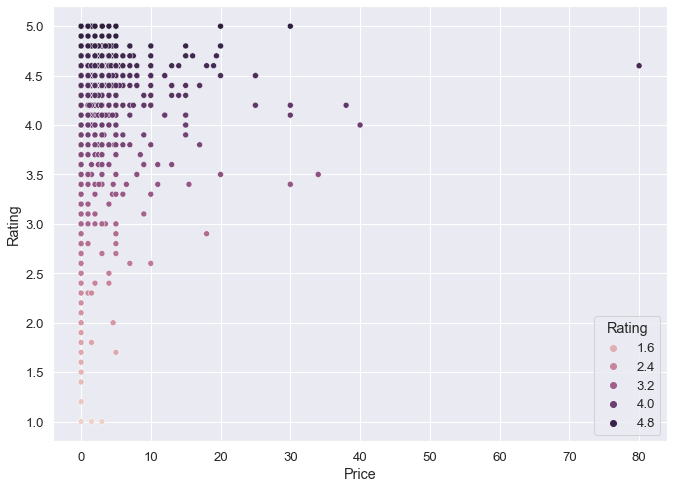

In [600]:
plt.figure(figsize=(11,8))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1.2)
sns.scatterplot(googleplay_df.Price,googleplay_df.Rating,hue=googleplay_df.Rating)

plt.show()

<AxesSubplot:xlabel='Price', ylabel='Rating'>

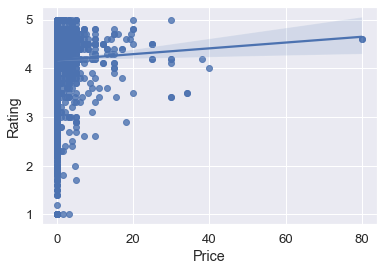

In [601]:
sns.regplot(x=googleplay_df['Price'], y=googleplay_df['Rating'])

# The regression line shows a slight positive correlation between Price and Rating, but as the 90% of prices are under 20$, that is not a conclusion we can take

# 7.2. Make scatter plot/joinplot for Rating vs. Size / 7.2.1. Are heavier apps rated better?

<AxesSubplot:xlabel='Size', ylabel='Rating'>

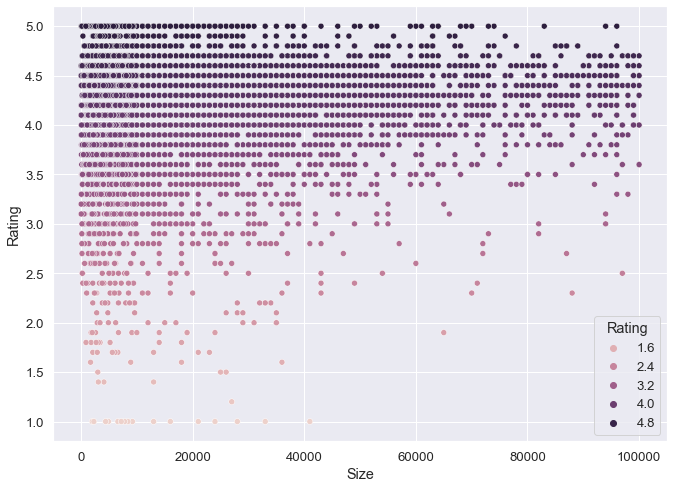

In [602]:
plt.figure(figsize=(11,8))
sns.scatterplot(googleplay_df.Size, googleplay_df.Rating, hue=googleplay_df.Rating)

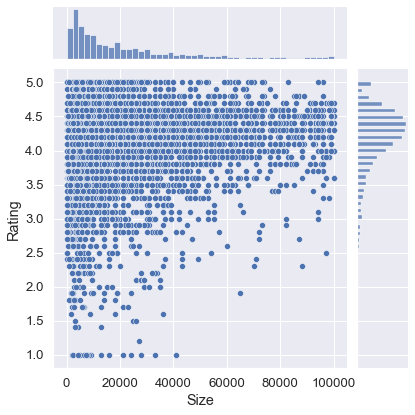

In [492]:
sns.jointplot(googleplay_df.Size, googleplay_df.Rating)
plt.show()

# It does look like heavier apps are better rated.

# 7.3. Make scatter plot/joinplot for Rating vs. Reviews. 7.3.1. Does more review mean a better rating always?

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

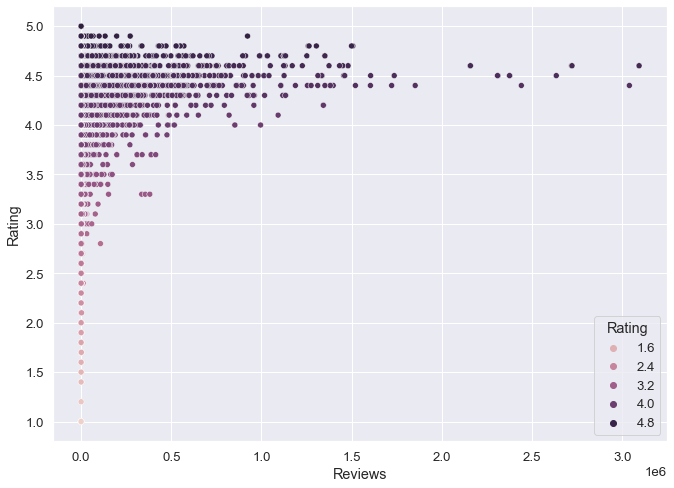

In [603]:
plt.figure(figsize=(11,8))
sns.scatterplot(googleplay_df.Reviews,googleplay_df.Rating,hue=googleplay_df.Rating)

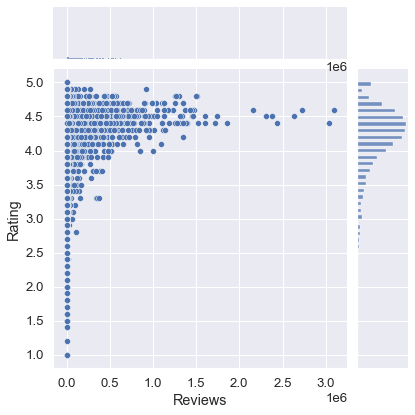

In [604]:
sns.jointplot(googleplay_df.Reviews, googleplay_df.Rating)
plt.show()

# the rating does not depend on the popularity.

# 7.4. Make boxplot for Rating vs. Content Rating / 7.4.1. Is there any difference in the ratings? Are some types liked better?

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

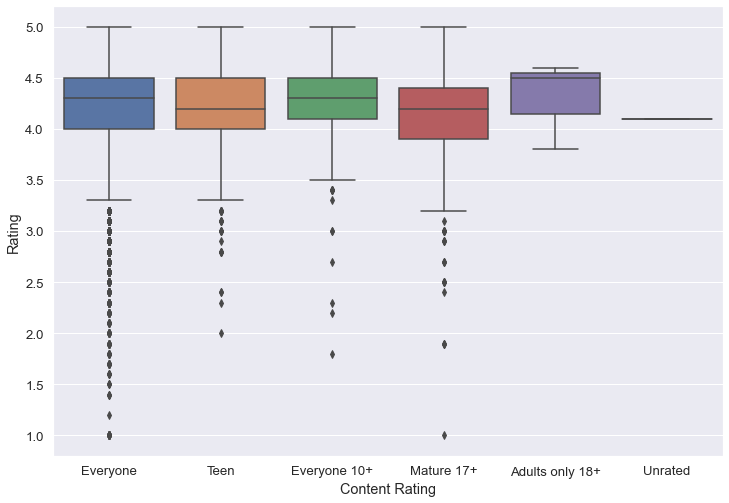

In [605]:
plt.figure(figsize=(12,8.27))
sns.boxplot(googleplay_df['Content Rating'],googleplay_df.Rating)

# the rating for “Adults Only 18+” is the highest.

# 7.5. Make boxplot for Ratings vs. Category / 7.5.1. Which genre has the best ratings? For each of the plots above, note down your observation.

Text(0, 0.5, 'Rating')

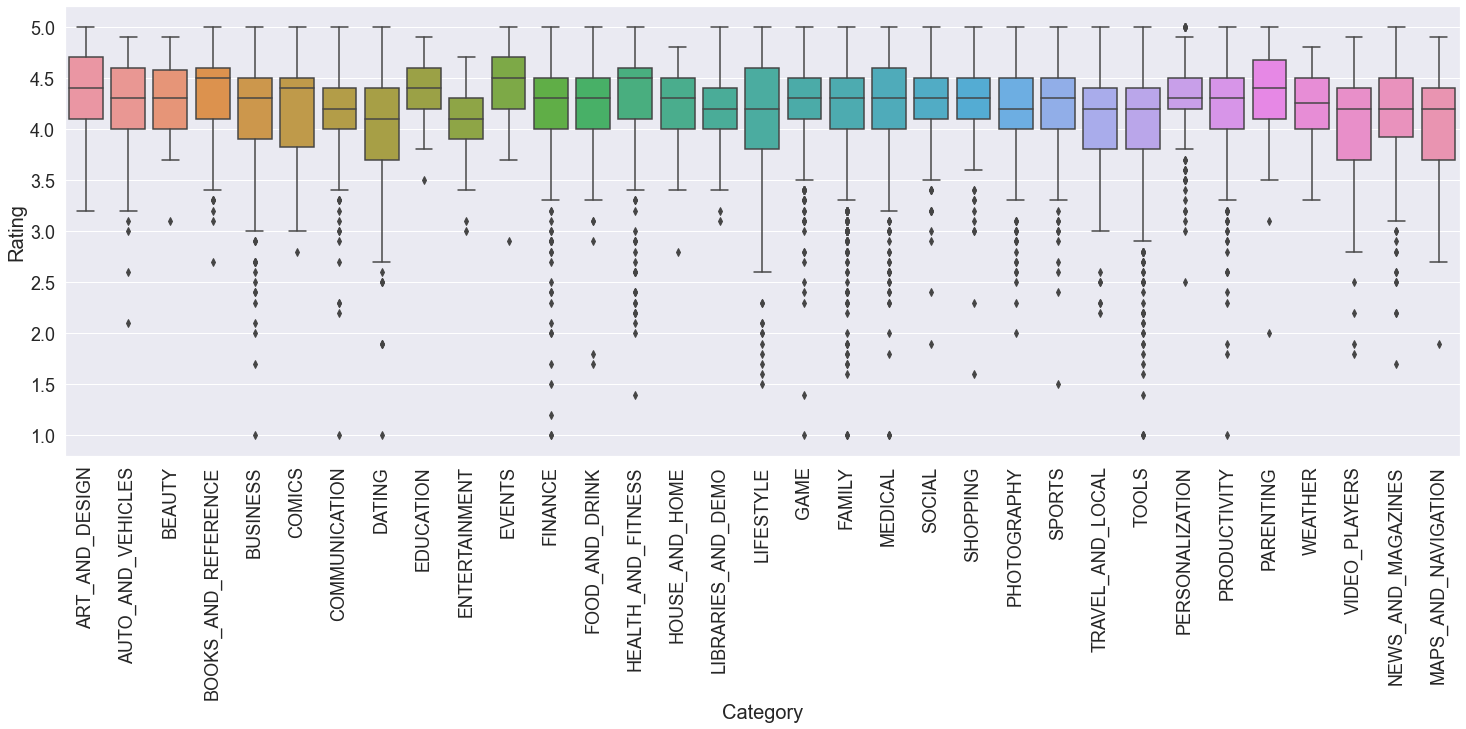

In [606]:
plt.figure(figsize=(25,8.27))
sns.boxplot(googleplay_df.Category,googleplay_df.Rating)
plt.xticks(fontsize=18,rotation='vertical')
plt.yticks(fontsize=18)
plt.xlabel("Category",fontsize=20)
plt.ylabel("Rating",fontsize=20)

# 7.5 Justification. Apps around Health & Fitness, Books and Reference, Events seem to have the highest median ratings.

# 8.  Data preprocessing. For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

# 8.1. Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [607]:
inp1=inp.copy(deep=True)

In [608]:
inp1['Installs']= np.log1p(inp1['Installs'])
inp1['Reviews']= np.log1p(inp1['Reviews'])

Text(0.5, 1.0, 'Reviews')

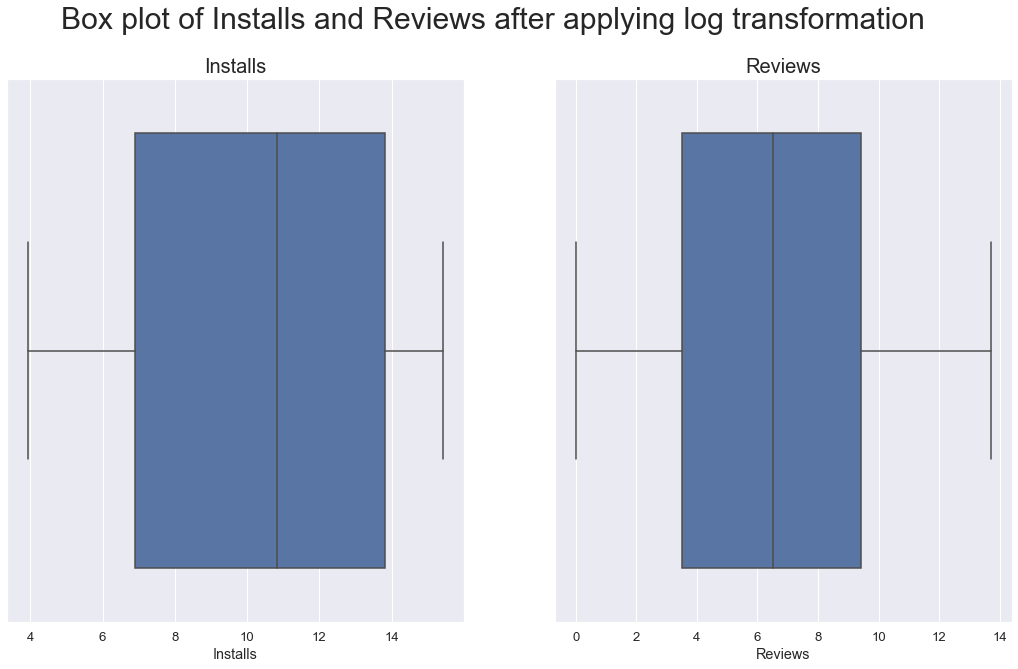

In [609]:
fig, axes = plt.subplots(1,2, figsize=(18, 10))
fig.suptitle('Box plot of Installs and Reviews after applying log transformation',fontsize=30)
sns.boxplot( inp1.Installs,ax=axes[0])
sns.boxplot( inp1.Reviews,ax=axes[1],)
axes[0].set_title("Installs",fontsize=20)
axes[1].set_title("Reviews",fontsize=20)

# 8.2. Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [610]:
inp1.drop(['App','Last Updated','Current Ver','Android Ver','Type'],axis=1,inplace=True)

In [611]:
inp1.shape

(8194, 8)

# 8.3. Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [612]:
cat_cols = ['Category', 'Content Rating','Genres']
inp2 = pd.get_dummies(inp1, columns=cat_cols, drop_first=True)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 9.  Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [669]:
X = googleplay_df['Reviews'].values.reshape(-1,1)
y = googleplay_df['Rating'].values.reshape(-1,1)

# 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [670]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [672]:
X_train.shape,X_test.shape

((6988, 1), (2996, 1))

# 11. Model building / Use linear regression as the technique 

In [671]:
reg1 = LinearRegression()  
reg1.fit(X_train, y_train) #training the algorithm

LinearRegression()

# Report the R2 on the train set

In [673]:
y_pred= reg1.predict(X_train)
print('\nR2 on train set: %.2f' % r2_score(y_train, y_pred).round(decimals=2))


R2 on train set: 0.03


# 12. Make predictions on test set and report R2.

In [683]:
y_pred2=reg1.predict(X_test)
r2=r2_score(y_test,y_pred2).round(decimals=2)

In [684]:
print('\nR2: %.2f' % r2)

print('\nMean Squared Error: %.2f'
      % mean_squared_error(y_test, y_pred2))

print("\nRoot Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred2)).round(decimals=2))


R2: 0.03

Mean Squared Error: 2.39

Root Mean Squared Error 1.55


In [690]:
Model=linreg.fit(X_train, y_train)
predict=linreg.predict(X_test)

y_test=np.array(y_test)
predict=np.array(predict)

a=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predict.flatten()});a.head(10)

,Actual,Predicted
0,3.9,3.673169
1,4.2,3.474537
2,2.1,3.474570
3,4.5,3.474799
4,4.0,3.475200
5,4.1,3.477263
6,3.9,3.481895
7,3.6,3.651899
8,3.7,3.475972
9,4.1,3.682923


<AxesSubplot:>

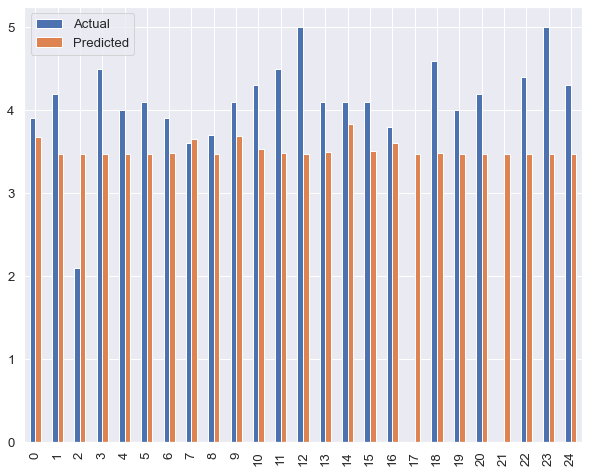

In [696]:
fig=a.head(25)
fig.plot(kind='bar',figsize=(10,8))

In [697]:
results=OLS( y_train,X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.121
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              958.4
Date:                Thu, 07 Jul 2022   Prob (F-statistic):                   2.60e-197
Time:                        22:44:17   Log-Likelihood:                         -18950.
No. Observations:                6988   AIC:                                  3.790e+04
Df Residuals:                    6987   BIC:                                  3.791e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          6.986e-06   2.26e-07     30.958      0.000    6.54e-06    7.43e-06
==============================================================================
Omnibus:                     3993.505   Durbin-Watson:                   0.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56041.089
Skew:                          -2.458   Prob(JB):                         0.00
Kurtosis:                      15.973   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""